# Tujuan Praktikum

1. Mahasiswa mengetahui penerapan deep learning dalam remote sensing.
2. Mahasiswa mengetahui perbandingan metode yang digunakan dalam mengatasi
rendahnya sinyal informasi pada pencitraan satelit.

# Peralatan Praktikum

1. Komputer/Laptop dengan sistem operasi windows
2. Jupyter Notebook/Google Colab
3. Dataset  
https://drive.google.com/drive/folders/1GnndbzVhyHVS69HZTMeCAM-ZL5-mByR9?usp=sharing

# Percobaan

## Pertama, Masukan listing code untuk mendeklarasikan library Keras dan SKlearn

In [ ]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
import argparse

#library sklearn
from PIL import Image
from imutils import paths
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

#library tensorflow keras
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam

In [ ]:
from keras.applications.vgg16 import VGG16
from keras.applications.resnet import ResNet50
from keras.applications.inception_v3 import InceptionV3
from keras.applications.inception_resnet_v2 import InceptionResNetV2

## Kedua, Labelisasi citra masukan

[INFO] loading images...
desert
[[0 0 0 1]
 [0 1 0 0]
 [0 0 0 1]
 ...
 [1 0 0 0]
 [0 0 1 0]
 [0 0 0 1]]


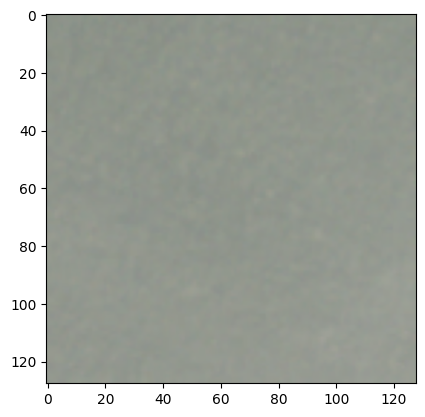

In [ ]:
print("[INFO] loading images...")
#mengisi variable imagePaths dengan 3scene
imagePaths = paths.list_images("/content/drive/My Drive/PRAKTIKUM PSD/U7/sceneData")

#mendeklarasikan variabel data dan labels sebagai list kosong
data = []
labels = []

#melakukan perulangan pada variabel imagePaths dan diassign ke imagePath
for imagePath in imagePaths:
  image = Image.open(imagePath) #gambar dibuka
  image = np.array(image.resize((128, 128))) / 255.0 #dilakukan resize (50,50,3)
  data.append(image) #gambar dimasukkan ke variable data
  label = imagePath.split(os.path.sep)[-2] #mengambil label dari pathfile
  labels.append(label) #label ditambahkan pada variabel list kosong labels

print(label)

#mengonversi label menjadi bentuk biner [0,0,0,1], [0,0,1,0], [0,1,0,0], [1,0,0,0]
lb = LabelBinarizer()
labels = lb.fit_transform(labels)

#memisahkan dataset pada data dan label perbandingan 75:25
#trainX-->gambar pelatihan, trainY-->label pelatihan, testX-->gambar pengujian, testY-->label pengujian
(trainX, testX, trainY, testY) =train_test_split(np.array(data),np.array(labels), test_size=0.25)
tes_data = testX[90]
plt.imshow(tes_data)
print(trainY)

## Ketiga, buat model pelatihan

### Transfer Learning

In [ ]:
from keras.applications.inception_resnet_v2 import InceptionResNetV2
from keras.layers import Flatten, Dense
from keras.models import Model
import tensorflow as tf

IMAGE_SIZE = [128, 128]

# Inisialisasi model InceptionV3
inception = InceptionResNetV2(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

# Menonaktifkan pelatihan untuk semua layer dalam model
for layer in inception.layers:
    layer.trainable = False

# Menambahkan lapisan Flatten dan lapisan Dense untuk output
x = Flatten()(inception.output)
prediction = Dense(4, activation='softmax')(x)

# Membuat model akhir
model = Model(inputs=inception.input, outputs=prediction)

# Mengompilasi model
model.compile(
    loss='categorical_crossentropy',
    optimizer=tf.optimizers.Adam(0.001),
    metrics=['accuracy']
)

# Menampilkan ringkasan model
model.summary()

219055592/219055592 [==============================] - 4s 0us/step
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 128, 128, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 63, 63, 32)           864       ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 63, 63, 32)           96        ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 activation (Activation)   

### Self Model

In [ ]:
# define our Convolutional Neural Network architecture
model = Sequential()
model.add(Conv2D(6, (3, 3), padding="same", input_shape=(128, 128, 3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Conv2D(12, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Conv2D(16, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(4))
model.add(Activation("softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 6)       168       
                                                                 
 activation (Activation)     (None, 128, 128, 6)       0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 64, 64, 6)         0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 12)        660       
                                                                 
 activation_1 (Activation)   (None, 64, 64, 12)        0         
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 32, 32, 12)        0         
 g2D)                                                   

### Visualisasi Model (Opsional)

## Keempat, Pelatihan Model

In [ ]:
# train the model using the Adam optimizer
print("[INFO] training network...")
opt = Adam(learning_rate=0.001)
model.compile(loss="categorical_crossentropy",optimizer=opt,metrics=["accuracy"])
H = model.fit(trainX, trainY, validation_data=(testX,testY),epochs=25, batch_size=1)

# evaluate the network
print("[INFO] evaluating network...")
predictions = model.predict(testX, batch_size=1)
print(classification_report(testY.argmax(axis=1),
predictions.argmax(axis=1), target_names=lb.classes_))

model.save("/content/drive/My Drive/PRAKTIKUM PSD/selfmodel.hdf5")

[INFO] training network...
Epoch 1/25
450/450 [==============================] - 6s 11ms/step - loss: 0.8687 - accuracy: 0.4822 - val_loss: 0.6889 - val_accuracy: 0.6533
Epoch 2/25
450/450 [==============================] - 4s 9ms/step - loss: 0.7186 - accuracy: 0.5533 - val_loss: 0.6910 - val_accuracy: 0.6533
Epoch 3/25
450/450 [==============================] - 5s 11ms/step - loss: 0.6273 - accuracy: 0.6667 - val_loss: 0.6913 - val_accuracy: 0.6133
Epoch 4/25
450/450 [==============================] - 4s 10ms/step - loss: 0.5631 - accuracy: 0.6422 - val_loss: 0.5331 - val_accuracy: 0.7067
Epoch 5/25
450/450 [==============================] - 4s 9ms/step - loss: 0.5090 - accuracy: 0.7356 - val_loss: 0.5642 - val_accuracy: 0.6067
Epoch 6/25
450/450 [==============================] - 6s 13ms/step - loss: 0.4986 - accuracy: 0.7267 - val_loss: 0.5869 - val_accuracy: 0.6667
Epoch 7/25
450/450 [==============================] - 4s 9ms/step - loss: 0.4882 - accuracy: 0.7511 - val_loss: 0.406

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## Kelima, Cek Konvergensi Model

### Loss

In [ ]:
H.history['loss']

[0.8686730861663818,
 0.7185968160629272,
 0.6272633671760559,
 0.5630576014518738,
 0.5090174078941345,
 0.4986291527748108,
 0.4882301986217499,
 0.4715406000614166,
 0.49609285593032837,
 0.4603189527988434,
 0.4936974048614502,
 0.43536606431007385,
 0.4667832553386688,
 0.4466856122016907,
 0.4424755573272705,
 0.4310537278652191,
 0.45068588852882385,
 0.44051387906074524,
 0.420606791973114,
 0.4494190216064453,
 0.4360657036304474,
 0.42067867517471313,
 0.42078959941864014,
 0.4062456488609314,
 0.4018878638744354]

### Accuracy

In [ ]:
H.history['accuracy']

[0.48222222924232483,
 0.5533333420753479,
 0.6666666865348816,
 0.6422222256660461,
 0.7355555295944214,
 0.7266666889190674,
 0.7511110901832581,
 0.695555567741394,
 0.7288888692855835,
 0.7355555295944214,
 0.7333333492279053,
 0.7666666507720947,
 0.7288888692855835,
 0.7355555295944214,
 0.742222249507904,
 0.7644444704055786,
 0.7355555295944214,
 0.7511110901832581,
 0.7844444513320923,
 0.7511110901832581,
 0.7644444704055786,
 0.7799999713897705,
 0.7777777910232544,
 0.8066666722297668,
 0.8088889122009277]

## Keenam, Visualisasi Kualitas Model

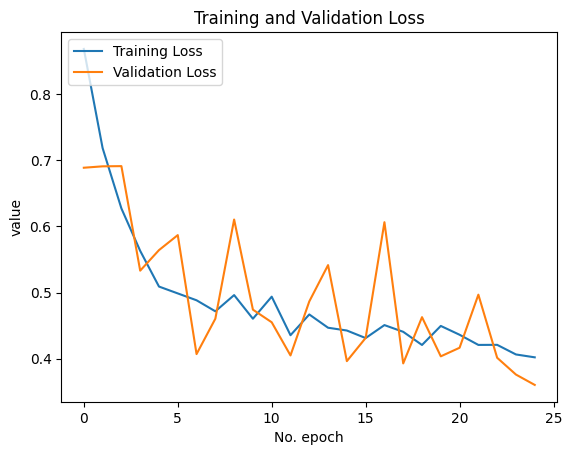

In [ ]:
# Plot history: MAE
import matplotlib.pyplot as plt
plt.plot(H.history['loss'], label='Training Loss')
plt.plot(H.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.ylabel('value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

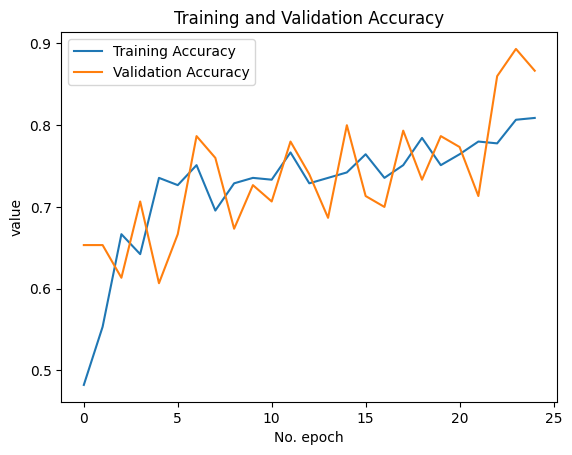

In [ ]:
# Plot history: MSE
plt.plot(H.history['accuracy'], label='Training Accuracy')
plt.plot(H.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.ylabel('value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

## Ketujuh, Test Model

1/1 [==============================] - 0s 66ms/step
cloudy 0.91080195


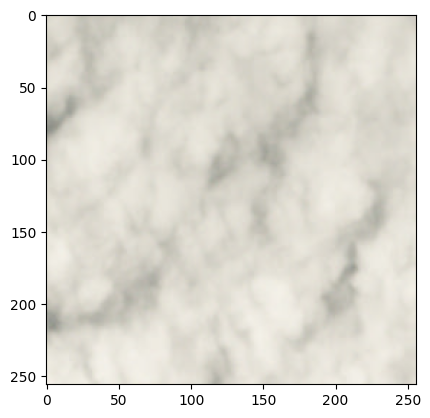

1/1 [==============================] - 0s 18ms/step
cloudy 0.8566681


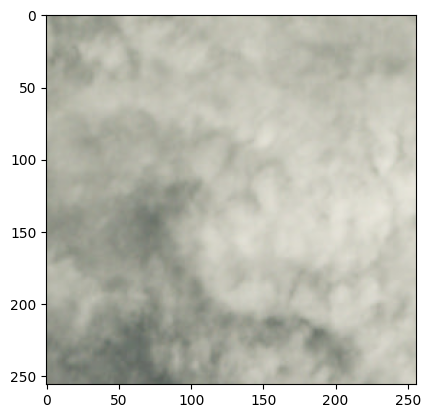

1/1 [==============================] - 0s 19ms/step
cloudy 0.9373822


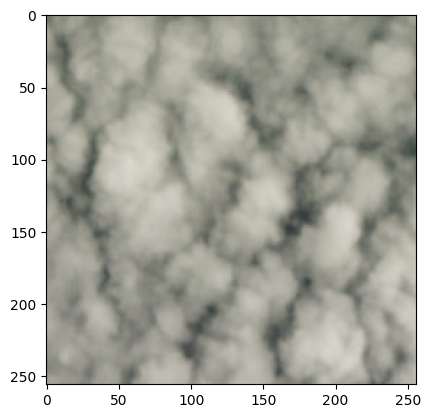

1/1 [==============================] - 0s 23ms/step
desert 0.9964173


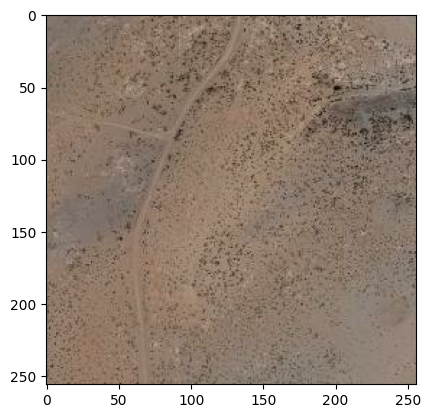

1/1 [==============================] - 0s 21ms/step
desert 0.6964214


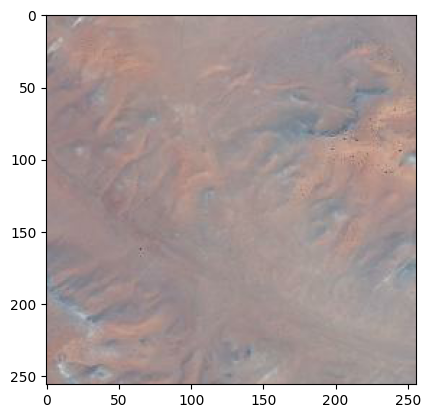

1/1 [==============================] - 0s 26ms/step
desert 0.9996704


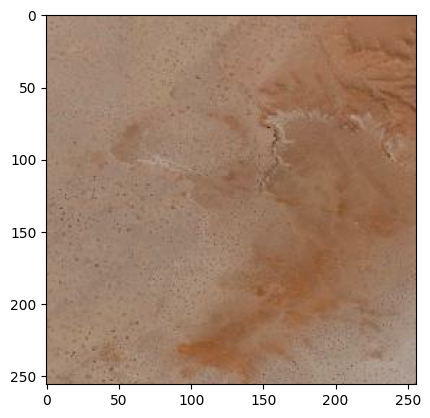

1/1 [==============================] - 0s 23ms/step
water 0.57850873


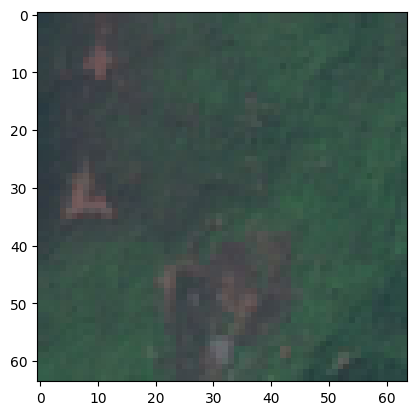

1/1 [==============================] - 0s 19ms/step
green_area 0.6743966


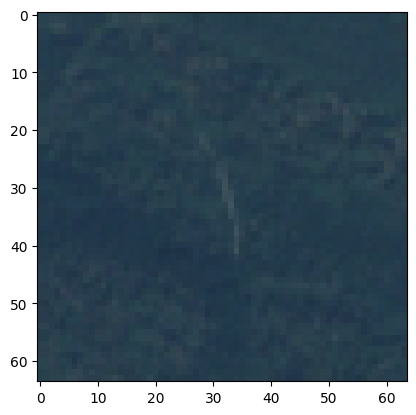

1/1 [==============================] - 0s 19ms/step
green_area 0.9969854


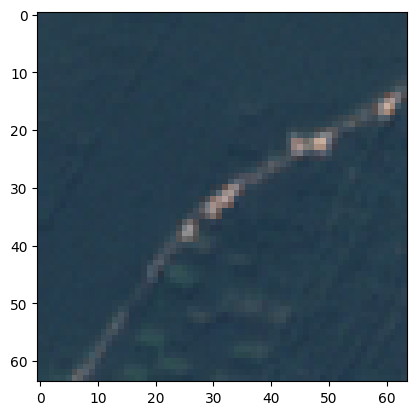

1/1 [==============================] - 0s 24ms/step
water 0.94386375


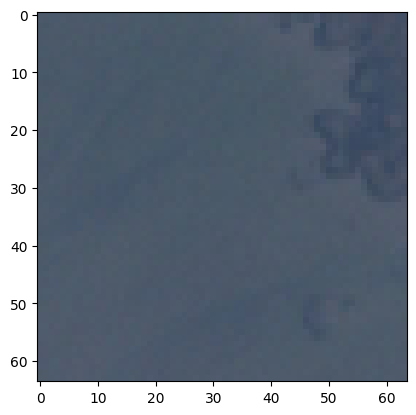

1/1 [==============================] - 0s 27ms/step
cloudy 0.8022503


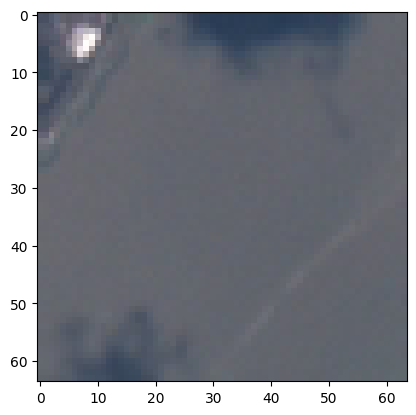

1/1 [==============================] - 0s 36ms/step
water 0.92244124


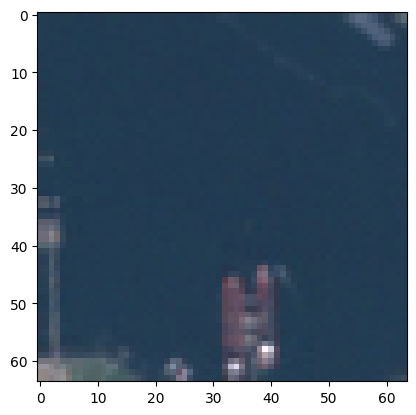

In [ ]:
from PIL import Image
# Parameters
input_size = (128,128)
#define input shape
channel = (3,)
input_shape = input_size + channel
#define labels
labels = ['cloudy', 'desert', 'green_area', 'water']

def preprocess(img,input_size):
  nimg = img.convert('RGB').resize(input_size, resample= 0)
  img_arr = (np.array(nimg))/255
  return img_arr
def reshape(imgs_arr):
  return np.stack(imgs_arr, axis=0)

from tensorflow.keras.models import load_model
MODEL_PATH = "/content/drive/My Drive/PRAKTIKUM PSD/selfmodel.hdf5"
model = load_model(MODEL_PATH,compile=False)

# read image
testImage = paths.list_images("/content/drive/My Drive/PRAKTIKUM PSD/U7/testCase")
for test in testImage:
  im = Image.open(test)
  X = preprocess(im,input_size)
  X = reshape([X])
  y = model.predict(X)
  print( labels[np.argmax(y)], np.max(y) )
  plt.imshow(im)
  plt.show()